In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
label=LabelEncoder()
data['sex']=label.fit_transform(data['sex'])
data['smoker']=label.fit_transform(data['smoker'])
data['region']=label.fit_transform(data['region'])

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
x=data.drop('charges',axis=1)
y=data['charges']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [22]:
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print(mse)
print(r2)

33635210.431178406
0.7086166433516324


In [20]:
new_value=np.array([[24,0,34.5,5,1,2]])
predicted=model.predict(new_value)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
print(f"Predicted value : {predicted}")

Predicted value : [31037.91204334]


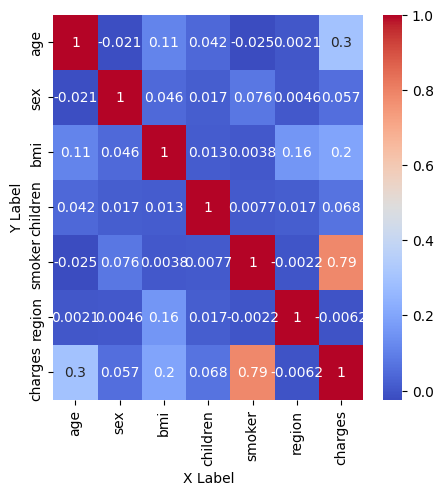

In [29]:
plt.figure(figsize=(5,5))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.xlabel("X Label")
plt.ylabel("Y Label")
plt.show()

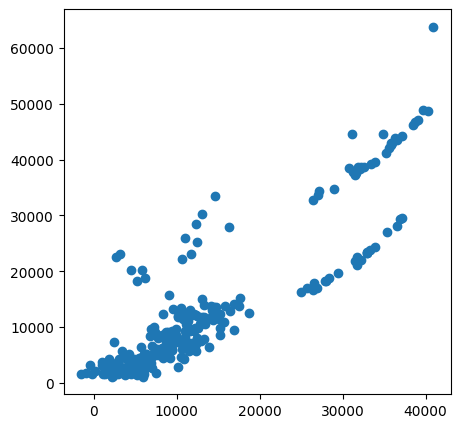

In [32]:
plt.figure(figsize=(5,5))
plt.scatter(y_pred,y_test)
plt.show()